In [ ]:
#!pip3 install seaborn

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
import os

In [2]:
df = pd.read_csv("data.csv")
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [3]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
# df_mean = df[["radius_mean", "perimeter_mean", "area_mean", "compactness_mean", "concavity_mean", "symmetry_mean"]]
# df_mean

In [ ]:
# plt.figure(figsize=(20,15))
# sns.heatmap(df_mean, annot=True)

array([[<AxesSubplot:xlabel='radius_mean', ylabel='radius_mean'>,
        <AxesSubplot:xlabel='perimeter_mean', ylabel='radius_mean'>,
        <AxesSubplot:xlabel='area_mean', ylabel='radius_mean'>,
        <AxesSubplot:xlabel='smoothness_mean', ylabel='radius_mean'>,
        <AxesSubplot:xlabel='concavity_mean', ylabel='radius_mean'>,
        <AxesSubplot:xlabel='symmetry_mean', ylabel='radius_mean'>],
       [<AxesSubplot:xlabel='radius_mean', ylabel='perimeter_mean'>,
        <AxesSubplot:xlabel='perimeter_mean', ylabel='perimeter_mean'>,
        <AxesSubplot:xlabel='area_mean', ylabel='perimeter_mean'>,
        <AxesSubplot:xlabel='smoothness_mean', ylabel='perimeter_mean'>,
        <AxesSubplot:xlabel='concavity_mean', ylabel='perimeter_mean'>,
        <AxesSubplot:xlabel='symmetry_mean', ylabel='perimeter_mean'>],
       [<AxesSubplot:xlabel='radius_mean', ylabel='area_mean'>,
        <AxesSubplot:xlabel='perimeter_mean', ylabel='area_mean'>,
        <AxesSubplot:xlabel='area_mea

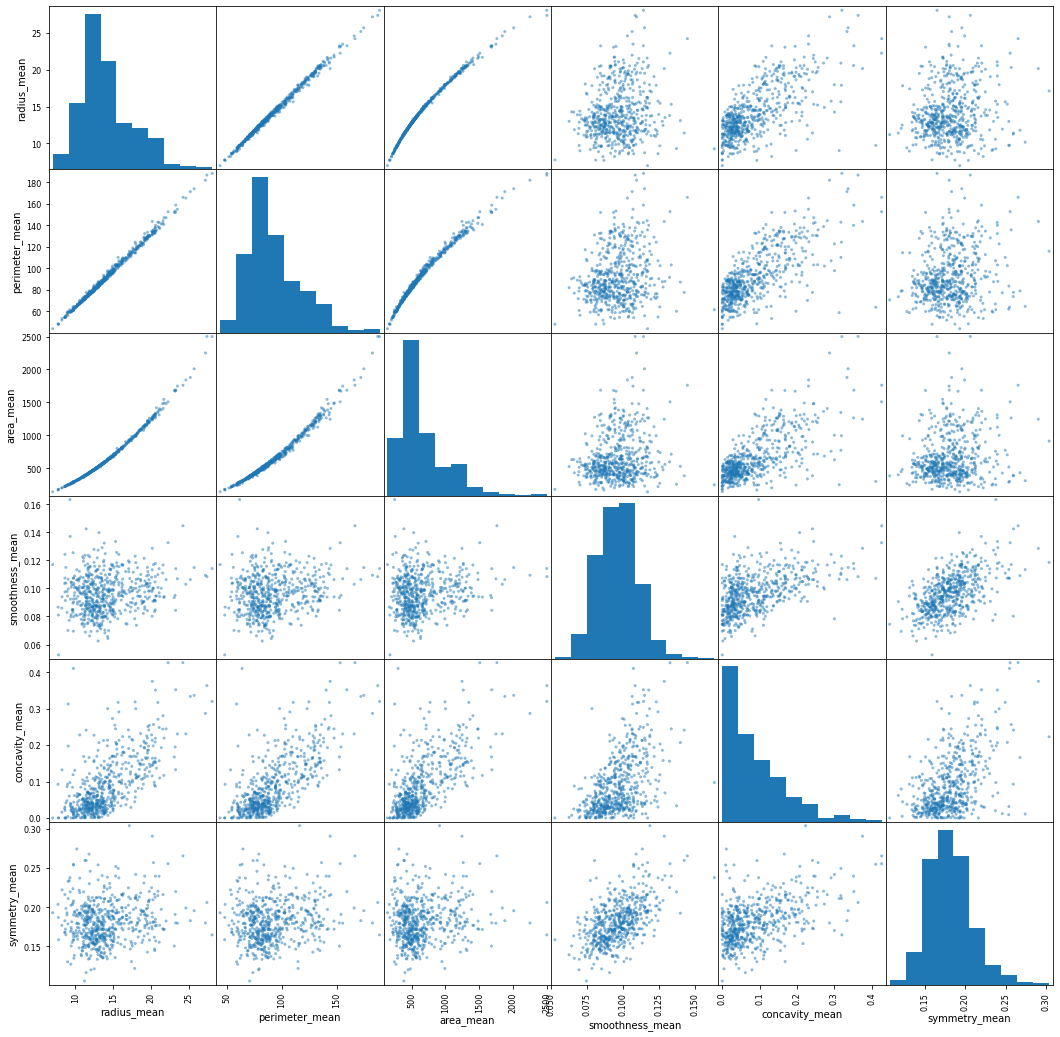

In [5]:
from pandas.plotting import scatter_matrix
attributes = ["radius_mean", "perimeter_mean", "area_mean", "smoothness_mean", "concavity_mean", "symmetry_mean"]
scatter_matrix(df[attributes], figsize=(18, 18))

In [ ]:
#df_worst

In [ ]:
#df_se

<AxesSubplot:>

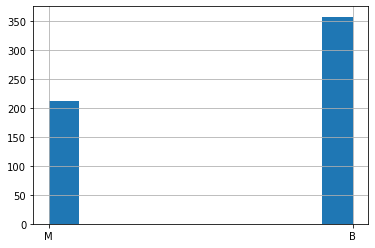

In [6]:
df['diagnosis'].hist()

In [7]:
cleaned_df = df.drop(["id"], axis=1)  

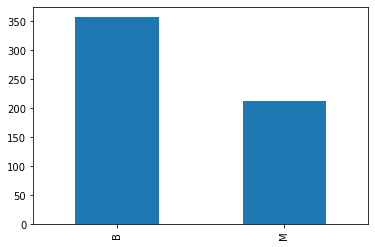

In [8]:
cleaned_df.diagnosis.value_counts()[0:30].plot(kind='bar')
plt.show()

In [9]:
y = cleaned_df["diagnosis"]

In [10]:
X = cleaned_df.drop(columns=["diagnosis"])
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [62]:
# Set features. This will also be used as your x values.
from sklearn.model_selection import train_test_split
y = cleaned_df["diagnosis"]

In [12]:
X = cleaned_df.drop(["diagnosis"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [14]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [15]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=10, activation='relu', input_dim=30))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [18]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Train on 426 samples
Epoch 1/100
426/426 - 0s - loss: 0.6811 - accuracy: 0.7418
Epoch 2/100
426/426 - 0s - loss: 0.6638 - accuracy: 0.7864
Epoch 3/100
426/426 - 0s - loss: 0.6469 - accuracy: 0.8122
Epoch 4/100
426/426 - 0s - loss: 0.6297 - accuracy: 0.8216
Epoch 5/100
426/426 - 0s - loss: 0.6103 - accuracy: 0.8310
Epoch 6/100
426/426 - 0s - loss: 0.5878 - accuracy: 0.8427
Epoch 7/100
426/426 - 0s - loss: 0.5606 - accuracy: 0.8568
Epoch 8/100
426/426 - 0s - loss: 0.5288 - accuracy: 0.8685
Epoch 9/100
426/426 - 0s - loss: 0.4932 - accuracy: 0.8756
Epoch 10/100
426/426 - 0s - loss: 0.4583 - accuracy: 0.8779
Epoch 11/100
426/426 - 0s - loss: 0.4232 - accuracy: 0.8873
Epoch 12/100
426/426 - 0s - loss: 0.3907 - accuracy: 0.8850
Epoch 13/100
426/426 - 0s - loss: 0.3618 - accuracy: 0.8873
Epoch 14/100
426/426 - 0s - loss: 0.3358 - accuracy: 0.8944
Epoch 15/100
426/426 - 0s - loss: 0.3132 - accuracy: 0.8920
Epoch 16/100
426/426 - 0s - loss: 0.2966 - accuracy: 0.8967
Epoch 17/100
426/426 - 0s - 

In [20]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

143/143 - 0s - loss: 0.0583 - accuracy: 0.9720
Normal Neural Network - Loss: 0.058271179066879765, Accuracy: 0.9720279574394226


In [21]:
cleaned_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<AxesSubplot:>

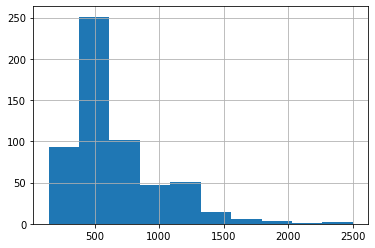

In [22]:
cleaned_df["area_mean"].hist()

<AxesSubplot:xlabel='area_mean'>

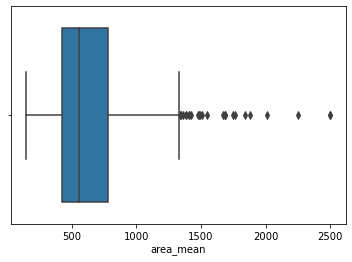

In [23]:
sns.boxplot(x=cleaned_df['area_mean'])

<AxesSubplot:xlabel='perimeter_mean'>

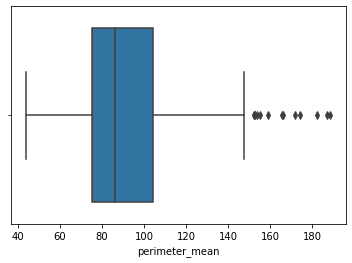

In [24]:
sns.boxplot(x=cleaned_df['perimeter_mean'])

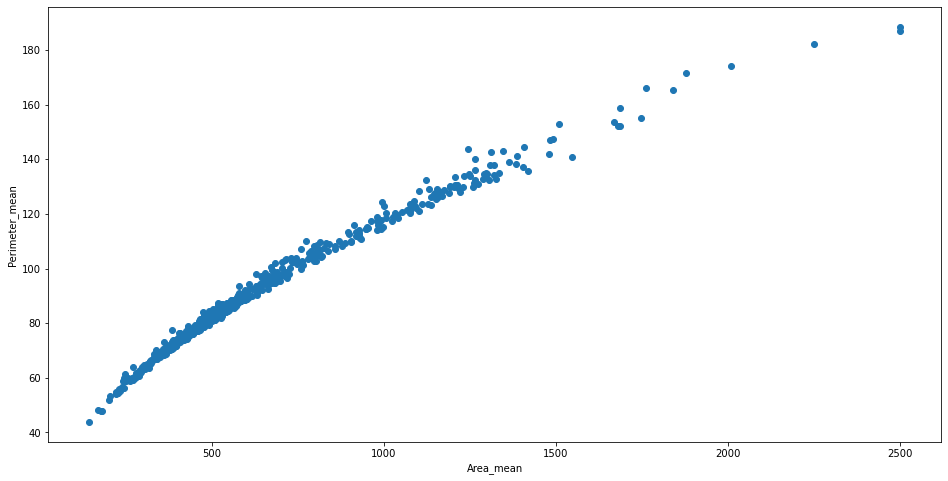

In [25]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(cleaned_df['area_mean'], cleaned_df['perimeter_mean'])
ax.set_xlabel('Area_mean')
ax.set_ylabel('Perimeter_mean')
plt.show()

In [26]:
df1 = cleaned_df.drop(columns=['diagnosis'], axis=1)
df1

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [27]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df1))
print(z)

[[1.09706398 2.07333501 1.26993369 ... 2.29607613 2.75062224 1.93701461]
 [1.82982061 0.35363241 1.68595471 ... 1.0870843  0.24388967 0.28118999]
 [1.57988811 0.45618695 1.56650313 ... 1.95500035 1.152255   0.20139121]
 ...
 [0.70228425 2.0455738  0.67267578 ... 0.41406869 1.10454895 0.31840916]
 [1.83834103 2.33645719 1.98252415 ... 2.28998549 1.91908301 2.21963528]
 [1.80840125 1.22179204 1.81438851 ... 1.74506282 0.04813821 0.75120669]]


In [28]:
threshold = 3
print(np.where(z > 3))

(array([  0,   3,   3,   3,   3,   3,   3,   3,   3,   9,   9,   9,  12,
        12,  12,  12,  12,  14,  14,  23,  25,  31,  31,  35,  42,  42,
        42,  60,  68,  68,  68,  68,  71,  71,  71,  71,  72,  78,  78,
        78,  78,  78,  82,  82,  82,  82,  82,  82,  82,  83, 105, 105,
       108, 108, 108, 108, 108, 108, 112, 112, 116, 119, 119, 122, 122,
       122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122,
       138, 138, 146, 146, 146, 151, 151, 152, 152, 152, 152, 152, 152,
       176, 176, 180, 180, 180, 180, 180, 180, 180, 181, 181, 190, 190,
       190, 190, 190, 192, 202, 203, 212, 212, 212, 212, 212, 212, 212,
       213, 213, 213, 213, 213, 219, 219, 232, 236, 236, 239, 239, 258,
       258, 258, 259, 259, 265, 265, 265, 265, 265, 288, 288, 290, 290,
       314, 314, 318, 323, 339, 339, 345, 351, 352, 352, 352, 352, 352,
       352, 352, 352, 368, 368, 370, 376, 376, 376, 379, 379, 379, 388,
       389, 400, 416, 417, 417, 430, 461, 461, 461, 461, 461, 4

In [29]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

radius_mean                  4.080000
texture_mean                 5.630000
perimeter_mean              28.930000
area_mean                  362.400000
smoothness_mean              0.018930
compactness_mean             0.065480
concavity_mean               0.101140
concave points_mean          0.053690
symmetry_mean                0.033800
fractal_dimension_mean       0.008420
radius_se                    0.246500
texture_se                   0.640100
perimeter_se                 1.751000
area_se                     27.340000
smoothness_se                0.002977
compactness_se               0.019370
concavity_se                 0.026960
concave points_se            0.007072
symmetry_se                  0.008320
fractal_dimension_se         0.002310
radius_worst                 5.780000
texture_worst                8.640000
perimeter_worst             41.290000
area_worst                 568.700000
smoothness_worst             0.029400
compactness_worst            0.191900
concavity_wo

In [30]:
balanced_df = cleaned_df[(z < 3).all(axis=1)]
balanced_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


<AxesSubplot:>

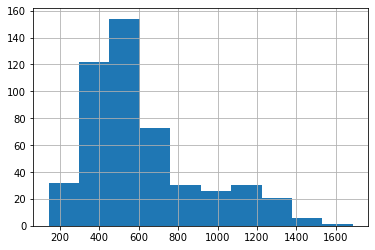

In [31]:
balanced_df["area_mean"].hist()

<AxesSubplot:xlabel='area_mean'>

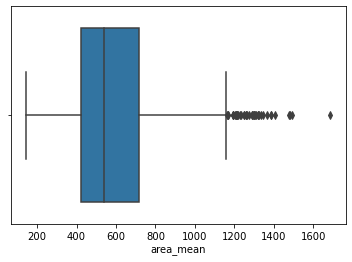

In [32]:
sns.boxplot(x=balanced_df['area_mean'])

<AxesSubplot:xlabel='perimeter_mean'>

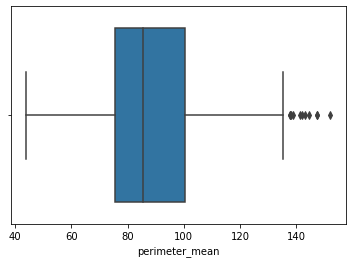

In [33]:
sns.boxplot(x=balanced_df['perimeter_mean'])

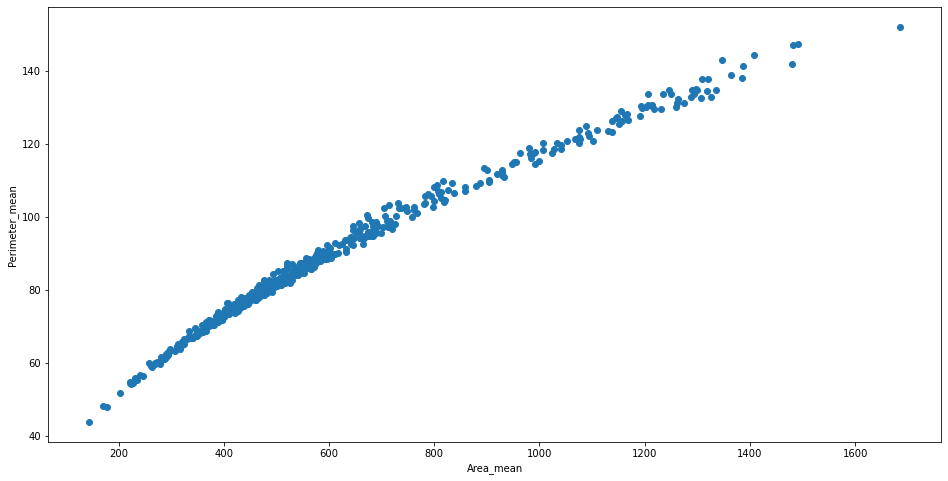

In [34]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(balanced_df['area_mean'], balanced_df['perimeter_mean'])
ax.set_xlabel('Area_mean')
ax.set_ylabel('Perimeter_mean')
plt.show()

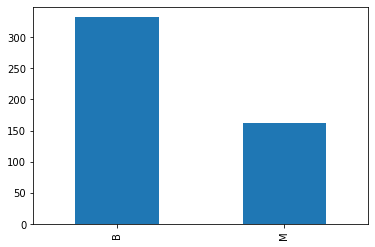

In [35]:
balanced_df.diagnosis.value_counts()[0:30].plot(kind='bar')
plt.show()

In [36]:
y = balanced_df["diagnosis"]

In [37]:
X = balanced_df.drop(columns=["diagnosis"])
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,0.05742,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


In [38]:
# Set features. This will also be used as your x values.
from sklearn.model_selection import train_test_split
y = balanced_df["diagnosis"]

In [39]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [40]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [41]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [43]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=10, activation='relu', input_dim=30))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [44]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Train on 426 samples
Epoch 1/100
426/426 - 0s - loss: 0.6839 - accuracy: 0.5141
Epoch 2/100
426/426 - 0s - loss: 0.6528 - accuracy: 0.8427
Epoch 3/100
426/426 - 0s - loss: 0.6218 - accuracy: 0.8568
Epoch 4/100
426/426 - 0s - loss: 0.5894 - accuracy: 0.8756
Epoch 5/100
426/426 - 0s - loss: 0.5535 - accuracy: 0.8897
Epoch 6/100
426/426 - 0s - loss: 0.5153 - accuracy: 0.8920
Epoch 7/100
426/426 - 0s - loss: 0.4735 - accuracy: 0.8850
Epoch 8/100
426/426 - 0s - loss: 0.4322 - accuracy: 0.9131
Epoch 9/100
426/426 - 0s - loss: 0.3876 - accuracy: 0.9108
Epoch 10/100
426/426 - 0s - loss: 0.3528 - accuracy: 0.9085
Epoch 11/100
426/426 - 0s - loss: 0.3192 - accuracy: 0.9155
Epoch 12/100
426/426 - 0s - loss: 0.2936 - accuracy: 0.9178
Epoch 13/100
426/426 - 0s - loss: 0.2715 - accuracy: 0.9202
Epoch 14/100
426/426 - 0s - loss: 0.2525 - accuracy: 0.9225
Epoch 15/100
426/426 - 0s - loss: 0.2361 - accuracy: 0.9272
Epoch 16/100
426/426 - 0s - loss: 0.2225 - accuracy: 0.9272
Epoch 17/100
426/426 - 0s - 

In [46]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

143/143 - 0s - loss: 0.0546 - accuracy: 0.9860
Normal Neural Network - Loss: 0.054642098324073775, Accuracy: 0.9860140085220337


In [47]:
encoded_predictions = model.predict_classes(X_test_scaled[:10])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [48]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[:10])}")

Predicted classes: ['B' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'B']
Actual Labels: ['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B']


In [49]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model_2 = SVC(kernel='linear', C=10, gamma=0.0001)
model_2.fit(X_train_scaled, y_train)

SVC(C=10, gamma=0.0001, kernel='linear')

In [50]:
model_2.score(X_test_scaled, y_test)

0.972027972027972

In [51]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(model_2, param_grid, verbose=3)

In [52]:
# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.988, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.965, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.988, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.965, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.976, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.988, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.1s finished


GridSearchCV(estimator=SVC(C=10, gamma=0.0001, kernel='linear'),
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
             verbose=3)

In [53]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'gamma': 0.0001}
0.976497948016416


In [54]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

In [55]:
#Create a Gaussian Classifier
model = GaussianNB()

In [56]:
# Train the model using the training sets
model.fit(X_train, y_train)

GaussianNB()

In [57]:
# #Import Gaussian Naive Bayes model
# from sklearn.naive_bayes import GaussianNB

# #Create a Gaussian Classifier
# gnb = GaussianNB()

#Train the model using the training sets
model.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)
print(y_pred)

['B' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B'
 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M'
 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M'
 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'M'
 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'B']


In [58]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.958041958041958


In [59]:
from sklearn import tree
import pandas as pd
import os

In [60]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9440559440559441

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.972027972027972